In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
sb.set()
df = pd.read_csv("titanic_prepared_data.csv")
df.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,0,0,1,0,0,1,2
1,1,0,38.0,1,0,0,1,0,0,2
2,1,0,26.0,0,0,1,0,0,1,1
3,1,0,35.0,1,0,0,0,0,1,2
4,0,1,35.0,0,0,1,0,0,1,1


In [2]:
X = df.iloc[:, 1:].values
Y = df.iloc[:, 0:1].values

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
print X_train.shape, X_test.shape
print Y_train.shape, Y_test.shape

(623L, 9L) (268L, 9L)
(623L, 1L) (268L, 1L)


In [8]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.02)

In [9]:
lg.fit(X_train, Y_train.ravel())

LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
Y_pred = lg.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score
acc_lg = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_lg

79.85


In [12]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.04)
lg.fit(X_train, Y_train.ravel())
Y_pred = lg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_lg = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_lg

80.97


In [13]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.06)
lg.fit(X_train, Y_train.ravel())
Y_pred = lg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_lg = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_lg

80.6


In [14]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.08)
lg.fit(X_train, Y_train.ravel())
Y_pred = lg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_lg = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_lg

82.09


In [15]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(C=0.1)
lg.fit(X_train, Y_train.ravel())
Y_pred = lg.predict(X_test)
from sklearn.metrics import accuracy_score
acc_lg = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_lg

80.22


import numpy as np
features = np.array([[1, 21, 1, 0, 0, 1, 0, 0, 3]])
print "1 for Survived\n0 for Unsurvived" + "Prediction :: " str(lg.predict(features))

In [16]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)

In [17]:
knn.fit(X_train, Y_train.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [18]:
Y_pred = knn.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
acc_knn = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_knn

77.24


In [20]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [21]:
gnb.fit(X_train, Y_train.ravel())

GaussianNB(priors=None)

In [22]:
Y_pred = gnb.predict(X_test)


In [23]:
from sklearn.metrics import accuracy_score
acc_gnb = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_gnb

76.49


In [24]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [25]:
dt.fit(X_train, Y_train.ravel())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [26]:
Y_pred = dt.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
acc_dt = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_dt

76.87


In [28]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)

In [29]:
rf.fit(X_train, Y_train.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [30]:
Y_pred = rf.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
acc_rf = round(accuracy_score(Y_pred, Y_test)*100, 2)
print acc_rf

78.36


In [35]:
models = pd.DataFrame({
    'Model' : ['Logistic', 'K-NN', 'GNB', 'D-Tree', 'RF'],
    'Score' : [acc_lg, acc_knn, acc_gnb, acc_dt, acc_rf]
})

In [36]:
models.head()

,Model,Score
0,Logistic,80.22
1,K-NN,77.24
2,GNB,76.49
3,D-Tree,76.87
4,RF,78.36


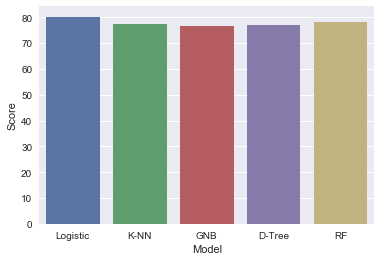

In [37]:
sb.barplot(x='Model', y='Score', data=models)